In [3]:
import numpy as np # linear Algebra
import pandas as pd # Data Processing CSV I/O (e.g. pd.read_csv)

# Plots or graphs
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning components
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [10]:
# Initial Overview of Data
init_data = pd.read_csv("winemag-data_first150k.csv")
print("Length of dataframe before duplicates are removed:", len(init_data))
init_data.head()

Length of dataframe before duplicates are removed: 150930


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [11]:
# Remove Duplicates
parsed_data = init_data[init_data.duplicated('description', keep = False)]
print("Length of dataframe after duplicates are removed:", len(parsed_data))

Length of dataframe after duplicates are removed: 92393


In [12]:
# Drop extra columns
parsed_data.dropna(subset=['description', 'points'])
print("Length of dataframe after NaNs are removed:", len(parsed_data))

Length of dataframe after NaNs are removed: 92393


In [18]:
# First look of Data
dp = parsed_data[['description', 'points']]
dp.info()
dp.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92393 entries, 25 to 150929
Data columns (total 2 columns):
description    92393 non-null object
points         92393 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


,description,points
25,"Yields were down in 2015, but intensity is up,...",94
29,This standout Rocks District wine brings earth...,94
60,"Concentrated, ripe blackberry and cassis aroma...",91
61,Moorooduc's estate Pinot Noir is a solid value...,91
62,Smoky aromas of fresh-cut wood blend with berr...,91


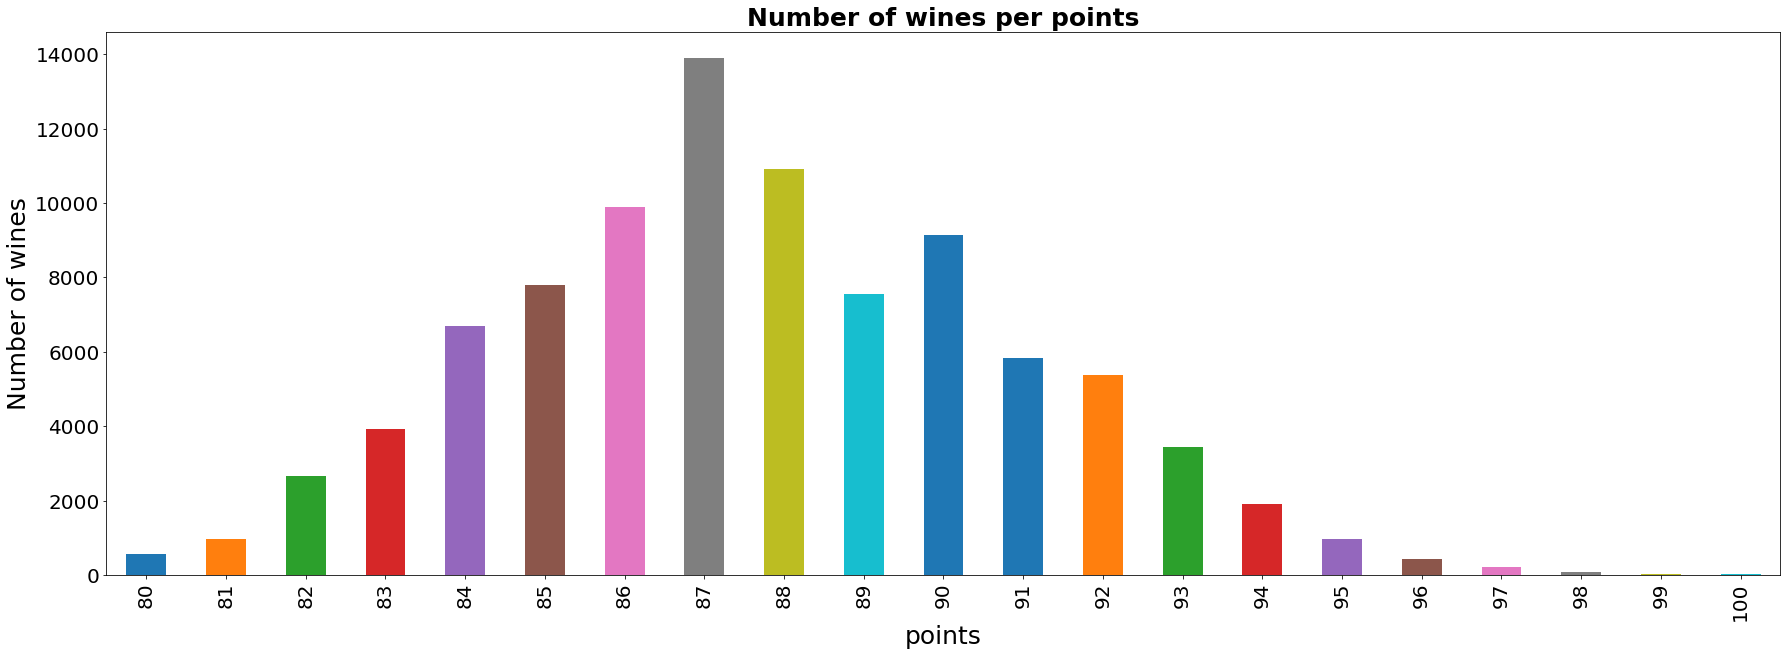

In [19]:
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Number of wines per points', fontweight="bold", size=25) # Title
ax.set_ylabel('Number of wines', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
dp.groupby(['points']).count()['description'].plot(ax=ax, kind='bar')

In [21]:
# Description length vs points
dp = dp.assign(description_length = dp['description'].apply(len))
dp.info()
dp.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92393 entries, 25 to 150929
Data columns (total 3 columns):
description           92393 non-null object
points                92393 non-null int64
description_length    92393 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.8+ MB


,description,points,description_length
25,"Yields were down in 2015, but intensity is up,...",94,215
29,This standout Rocks District wine brings earth...,94,333
60,"Concentrated, ripe blackberry and cassis aroma...",91,242
61,Moorooduc's estate Pinot Noir is a solid value...,91,315
62,Smoky aromas of fresh-cut wood blend with berr...,91,229


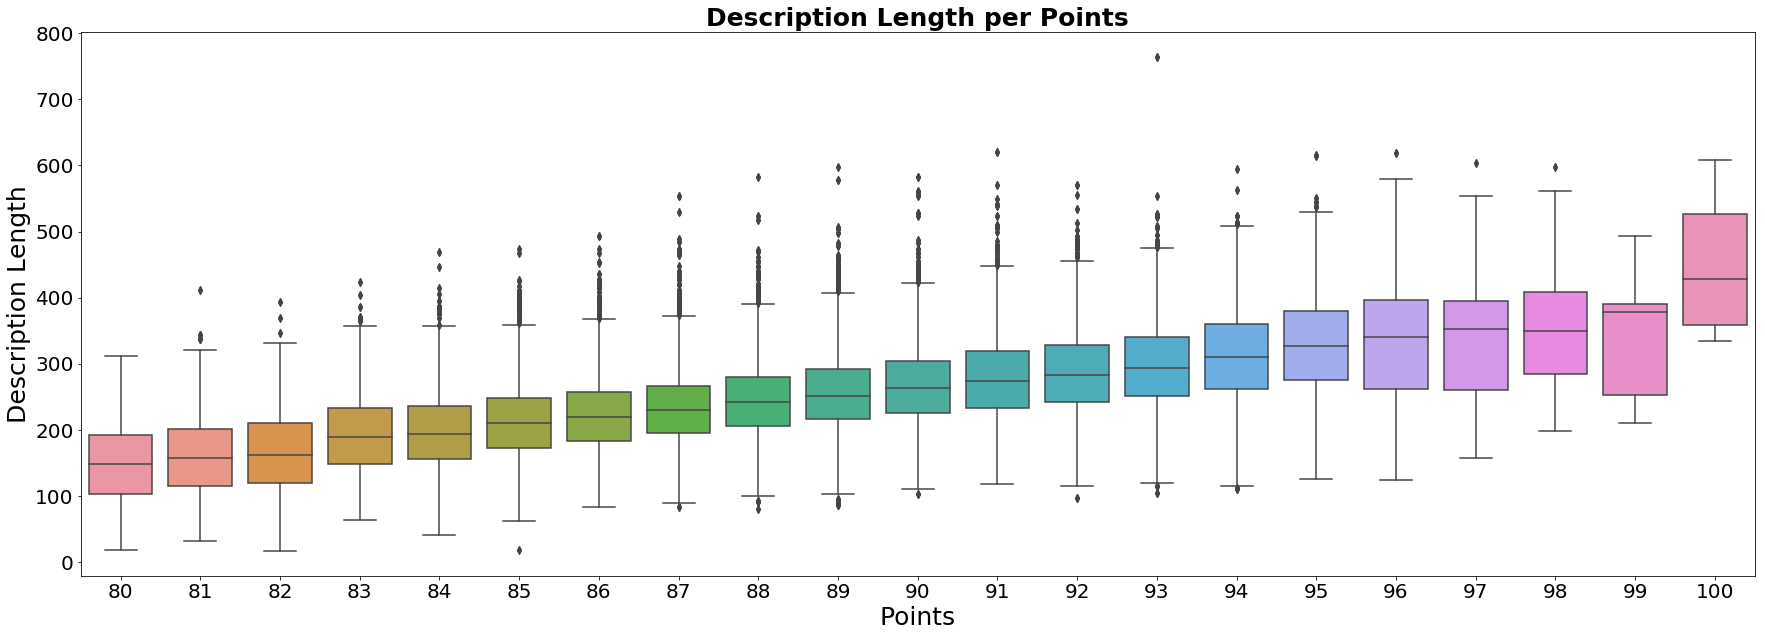

In [22]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='points', y='description_length', data=dp)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Description Length per Points', fontweight="bold", size=25) # Title
ax.set_ylabel('Description Length', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
plt.show()

In [23]:
# Transform method taking points as parameters
def transform_points_simplified(points):
    if points < 84:
        return 1
    elif points >=84 and points < 88:
        return 2
    elif points >=88 and points <92:
        return 3
    elif points >=92 and points <96:
        return 4
    else:
        return 5
    
# Applying transform method and assigning result to new column "points_simplified"
dp = dp.assign(points_simplified = dp['points'].apply(transform_points_simplified))
dp.head()

,description,points,description_length,points_simplified
25,"Yields were down in 2015, but intensity is up,...",94,215,4
29,This standout Rocks District wine brings earth...,94,333,4
60,"Concentrated, ripe blackberry and cassis aroma...",91,242,3
61,Moorooduc's estate Pinot Noir is a solid value...,91,315,3
62,Smoky aromas of fresh-cut wood blend with berr...,91,229,3


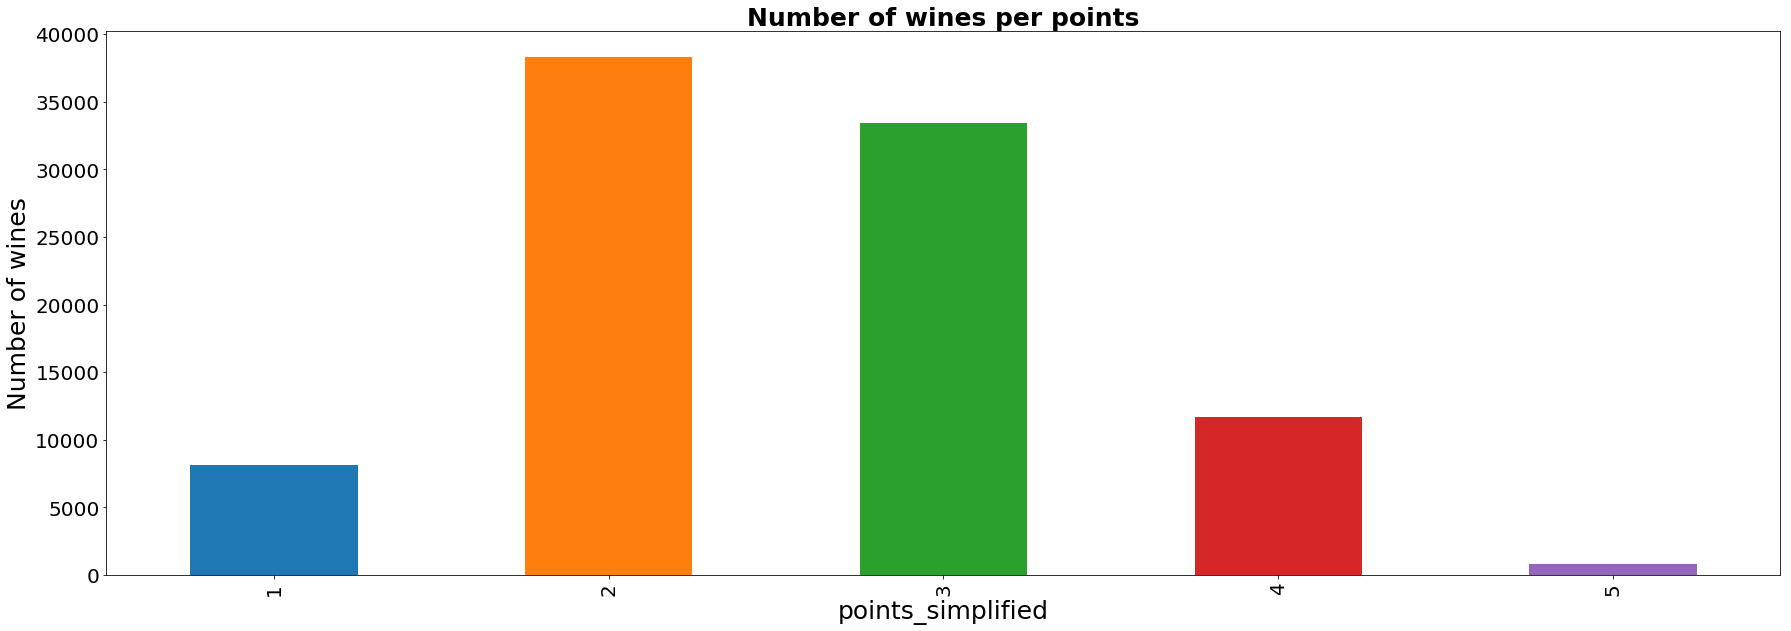

In [24]:
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Number of wines per points', fontweight="bold", size=25) # Title
ax.set_ylabel('Number of wines', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
dp.groupby(['points_simplified']).count()['description'].plot(ax=ax, kind='bar')

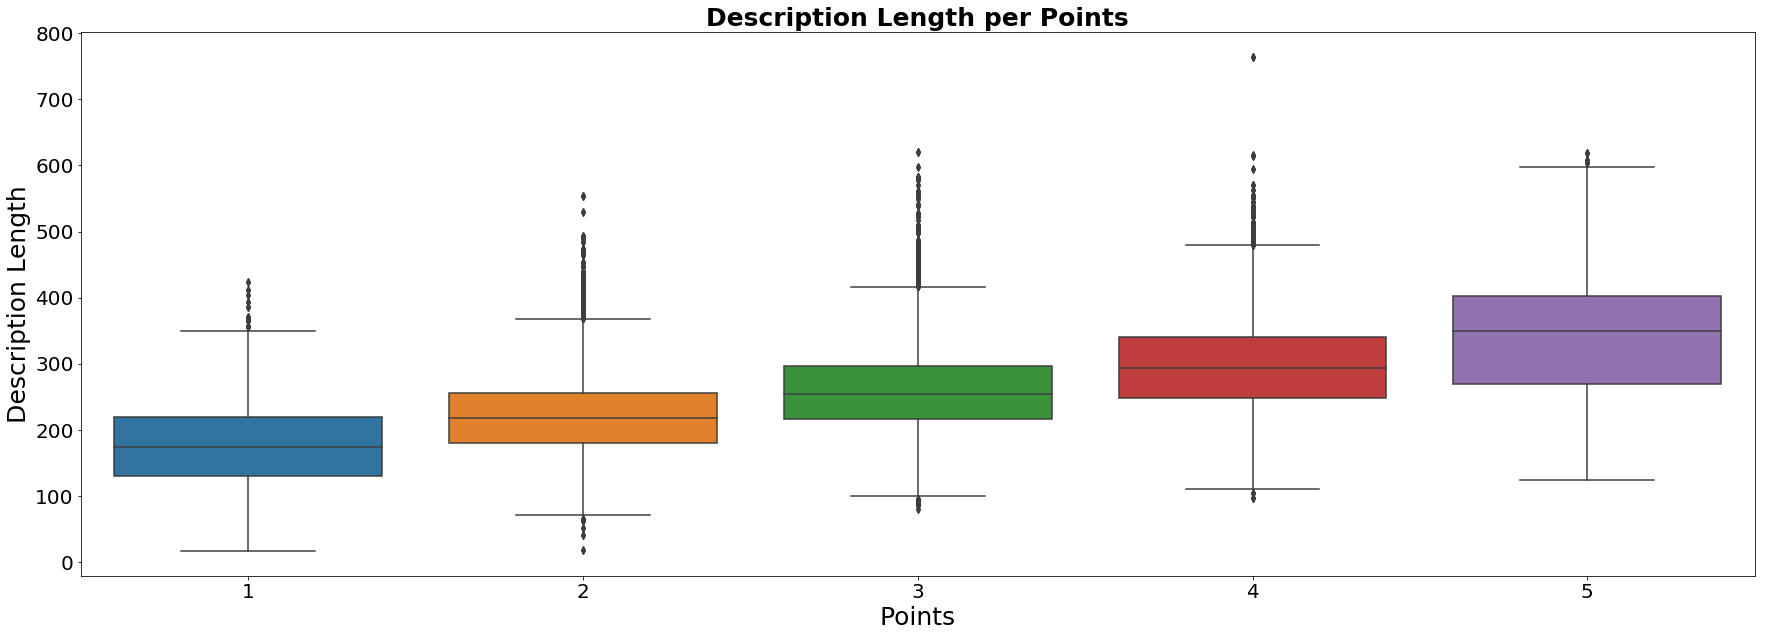

In [25]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='points_simplified', y='description_length', data=dp)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Description Length per Points', fontweight="bold", size=25) # Title
ax.set_ylabel('Description Length', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
plt.show()

# Description Vectorization

In [28]:
X = dp['description']
y = dp['points_simplified']

vectorizer = CountVectorizer()
vectorizer.fit(X)
#print(vectorizer.vocabulary_)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [29]:
# Lets vectorize X based on Trained Data
X = vectorizer.transform(X)
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)
# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (92393, 21400)
Amount of Non-Zero occurrences:  3172240
Density: 0.1604402000353832


In [31]:
# Train the Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
# Testing the model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          1       0.99      0.94      0.97       763
          2       0.95      0.99      0.97      3830
          3       0.97      0.96      0.96      3418
          4       1.00      0.93      0.96      1135
          5       1.00      0.91      0.96        94

avg / total       0.97      0.97      0.97      9240



Hence we predicted points assigned to each of those wines in the Test Data with 97% accuracy